In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
from matplotlib.lines import Line2D
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
path_to_results = '/home/ng213/pazy_code/pazy-aepw3-results/03_StaticAeroelastic/'

In [3]:
results = {}
alpha = np.array([5, 7])

results['sharpy_w_skin'] = {'filename': 'sharpy_w_skin',
                            'skin': True,
                            'label': 'SHARPy',
                            'line_format': {'ls': 'none', 
                                          'marker': 'o',
                                          'mfc': 'none', 'markevery':2}}
results['sharpy_wo_skin'] = {'filename': 'sharpy_wo_skin',
                            'skin': False,
                          'label': 'SHARPy',
                           'line_format': {'ls': 'none',
                                          'marker': 'o',
                                          'mfc': 'none', 'markevery':2}}

results['mrm_wo_skin'] = {'filename': 'mrm_umbeam_wo_skin',
                            'skin': False,
                          'label': 'MRM',
                           'line_format': {'ls': 'none',
                                           'marker': '^',
                                          'mfc': 'none'}}



results['mrm_w_skin'] = {'filename': 'mrm_umbeam_w_skin',
                            'skin': True,
                          'label': 'MRM',
                           'line_format': {'ls': 'none',
                                           'marker': '^',
                                          'mfc': 'none'}}

results['um_w_skin'] = {'filename': 'UMNAST_w_skin',
                            'skin': True,
                            'label': 'UM/NAST',
                            'line_format': {'ls': 'none', 
                                          'marker': 's',
                                          'mfc': 'none', 'markevery':2}}
results['um_wo_skin'] = {'filename': 'UMNAST_wo_skin',
                            'skin': False,
                          'label': 'UM/NAST',
                           'line_format': {'ls': 'none',
                                          'marker': 's',
                                          'mfc': 'none', 'markevery':2}}



results['technion_experimental'] = {'filename': 'technion_experimental',
                            'skin': True,
                          'label': 'Experimental',
                           'line_format': {'ls': 'none'}}

In [4]:
for case in results.values():
    case['data'] = []
    for aoa in alpha:
        case['data'].append(np.loadtxt(path_to_results + case['filename'] + '_alpha{:04g}.txt'.format(aoa * 100)))

In [5]:
rho = 1.225

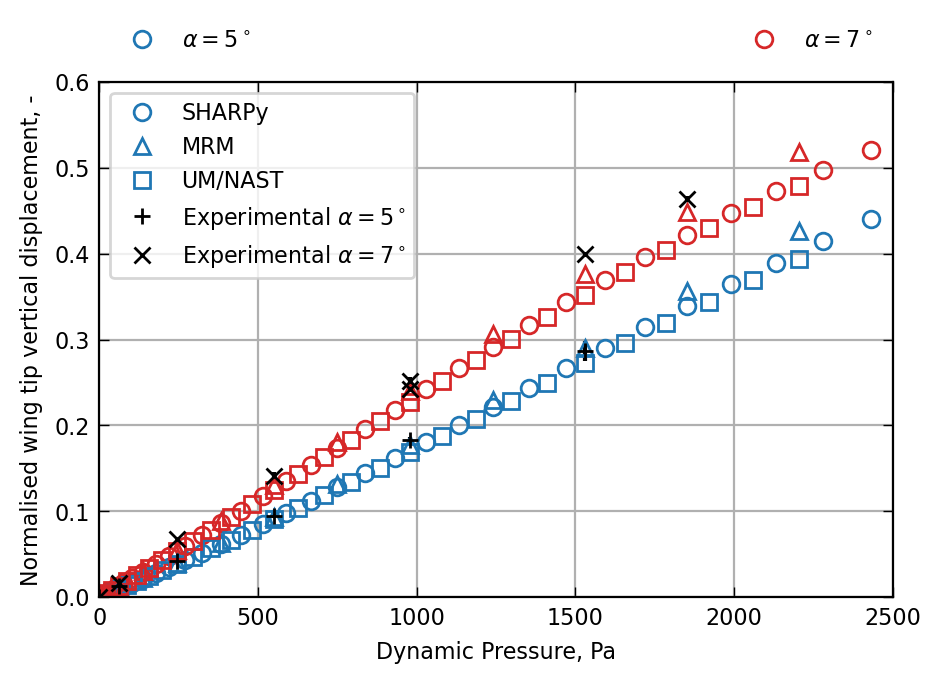

In [6]:
cm2in = 1/2.54
ar = 1.5
width_cm = 13

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(figsize=figsize)

color_list = ['tab:blue', 'tab:red']
marker_list = ['+', 'x']

legend_lines_list = []

for key, case in results.items():
    if case['skin']:
        a = ax
    else:
        continue 
    
    for i_alpha in range(len(alpha)):
        if key == 'technion_experimental':
            a.errorbar(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1] / 0.55, yerr=case['data'][i_alpha][:, 2]/ 0.55, fmt=marker_list[i_alpha], color='k',
                      label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]),)
            legend_lines_list.append(Line2D([0], [0], label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]), 
                                            marker=marker_list[i_alpha],
                                           ls='none', color='k'))
        else:
            a.plot(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1]/ 0.55, 
                   color=color_list[i_alpha],
                   label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]),
                   **case.get('line_format', {}))
            if i_alpha == 0:
                legend_lines_list.append(Line2D([0], [0], label=case['label'], **case.get('line_format', {})))

leg1 = ax.legend(handles=legend_lines_list, fontsize=8, loc='upper left')

alpha_leg = []
for i_alpha in range(len(alpha)):
    alpha_leg.append(Line2D([0], [0], label=r'$\alpha={}^\circ$'.format(alpha[i_alpha]), marker='o', color=color_list[i_alpha], ls='none', mfc='none'))

# leg2 = ax.legend(handles=alpha_leg, fontsize=8, loc='upper left')
ax.legend(handles=alpha_leg, frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2, mode='expand', fontsize=8)
ax.add_artist(leg1)


ax.set_ylim(0, 0.6)
ax.set_xlim(0, 2500)
ax.set_xlabel('Dynamic Pressure, Pa')
ax.set_ylabel('Normalised wing tip vertical displacement, -')
ax.grid()

for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
    item.set_fontsize(8)
    a.xaxis.set_tick_params(which='major', direction='in', top='on', width=0.5)
    a.xaxis.set_tick_params(which='minor', direction='in', top='on', width=0.5)
    a.yaxis.set_tick_params(which='major', direction='in', right='on', width=0.5)
    a.yaxis.set_tick_params(which='minor', direction='in', right='on', width=0.5)

# plt.savefig('../figures/03_StaticAeroelastic.pdf')

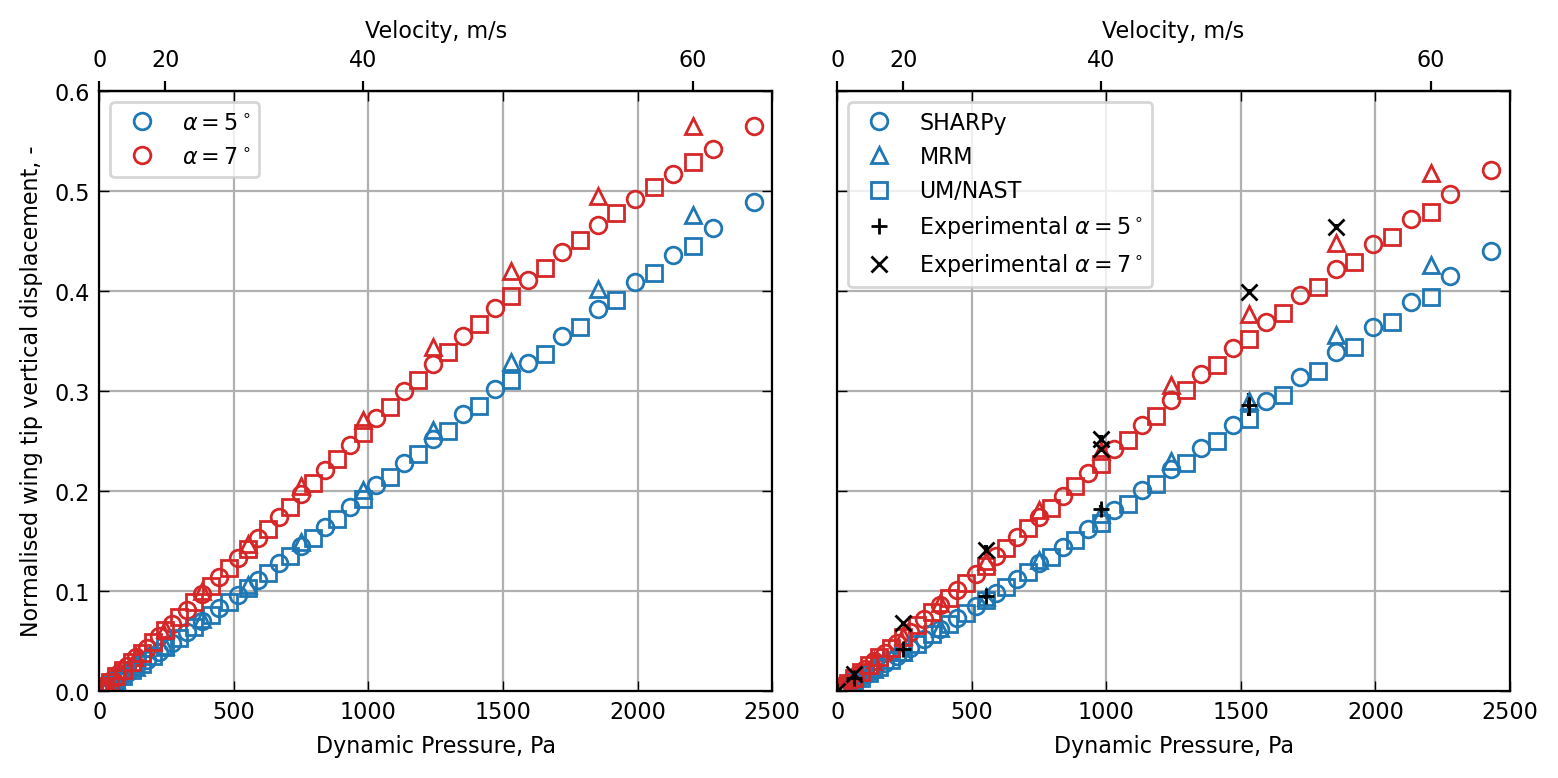

In [7]:
cm2in = 1/2.54
ar = 2
width_cm = 20

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(figsize=figsize, ncols=2, sharey=True)

color_list = ['tab:blue', 'tab:red']
marker_list = ['+', 'x']

legend_lines_list = []

for key, case in results.items():
    if case['skin']:
        a = ax[1]
    else:
        a = ax[0] 
    
    for i_alpha in range(len(alpha)):
        if key == 'technion_experimental':
            a.errorbar(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1] / 0.55, yerr=case['data'][i_alpha][:, 2]/ 0.55, fmt=marker_list[i_alpha], color='k',
                      label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]),)
            legend_lines_list.append(Line2D([0], [0], label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]), 
                                            marker=marker_list[i_alpha],
                                           ls='none', color='k'))
        else:
            a.plot(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1]/ 0.55, 
                   color=color_list[i_alpha],
                   label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]),
                   **case.get('line_format', {}))
            if i_alpha == 0:
                if case['skin']:
                    legend_lines_list.append(Line2D([0], [0], label=case['label'], **case.get('line_format', {})))

leg1 = ax[1].legend(handles=legend_lines_list, fontsize=8, loc='upper left')

alpha_leg = []
for i_alpha in range(len(alpha)):
    alpha_leg.append(Line2D([0], [0], label=r'$\alpha={}^\circ$'.format(alpha[i_alpha]), marker='o', color=color_list[i_alpha], ls='none', mfc='none'))

leg2 = ax[0].legend(handles=alpha_leg, fontsize=8, loc='upper left')
# ax[0].legend(handles=alpha_leg, frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2, mode='expand', fontsize=8)
# ax[0].add_artist(leg1)

def q2u(q):
    return np.sqrt(2*q/rho)

def u2q(u):
    return 0.5*rho*u**2

ax[0].set_ylabel('Normalised wing tip vertical displacement, -')

for a in ax:
    a.set_ylim(0, 0.6)
    a.set_xlim(0, 2500)
    a.set_xlabel('Dynamic Pressure, Pa')
    a.grid()
    
    secaxis = a.secondary_xaxis('top', functions=(q2u, u2q))
    secaxis.set_xlabel('Velocity, m/s')
    secaxis.set_xticks(np.array([0, 20, 40, 60]))
    secaxis.set_xticklabels([0, 20, 40, 60])
    # for ^ this to work, matplotlib 3.2.1 is required - need to update sharpy_env to include it

    for item in ([a.title, a.xaxis.label, a.yaxis.label, secaxis.xaxis.label] +
                 a.get_xticklabels() + a.get_yticklabels() + secaxis.get_xticklabels()):
        item.set_fontsize(8)
        a.xaxis.set_tick_params(which='major', direction='in', top='on', width=0.5)
        a.xaxis.set_tick_params(which='minor', direction='in', top='on', width=0.5)
        a.yaxis.set_tick_params(which='major', direction='in', right='on', width=0.5)
        a.yaxis.set_tick_params(which='minor', direction='in', right='on', width=0.5)

plt.tight_layout()

plt.savefig('../figures/03_StaticAeroelastic.pdf')


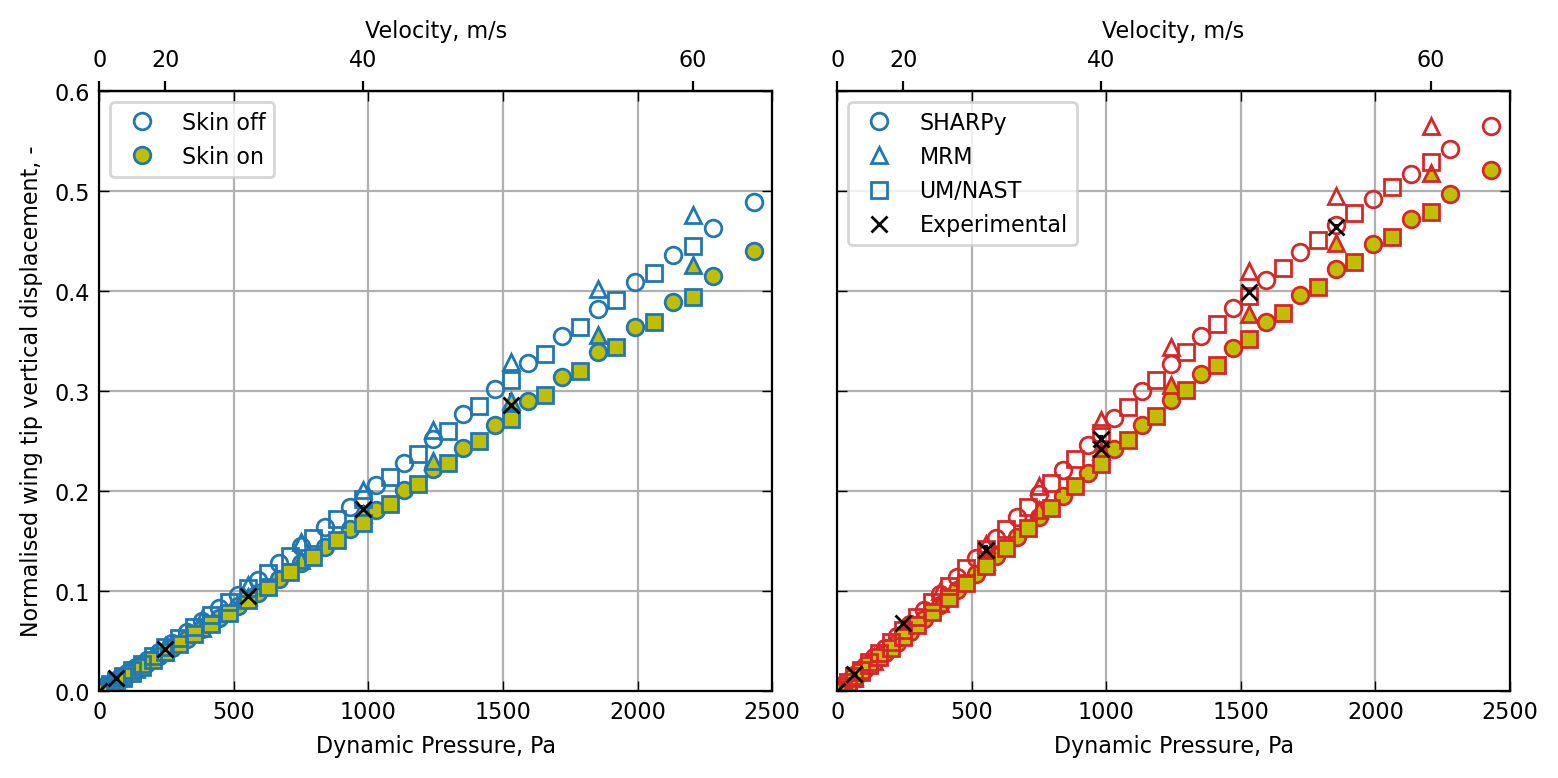

In [8]:
cm2in = 1/2.54
ar = 2
width_cm = 20

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(figsize=figsize, ncols=2, sharey=True)

color_list = ['tab:blue', 'tab:red']
marker_list = ['+', 'x']

legend_lines_list = []

for key, case in results.items():

    for i_alpha in range(len(alpha)):
        if i_alpha == 0:
            a = ax[0]
        else:
            a = ax[1]     
        if key == 'technion_experimental':
            a.errorbar(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1] / 0.55, yerr=case['data'][i_alpha][:, 2]/ 0.55, fmt=marker_list[1], color='k',
                      label=case['label'])
            if i_alpha == 0:
                legend_lines_list.append(Line2D([0], [0], label=case['label'], 
                                            marker=marker_list[1],
                                           ls='none', color='k'))
        else:
            linefmt = case.get('line_format', {}).copy()
            if case['skin']:
                linefmt['mfc'] = 'y'
            a.plot(0.5 * rho * case['data'][i_alpha][:, 0] ** 2, case['data'][i_alpha][:, 1]/ 0.55, 
                   color=color_list[i_alpha],
                   label=case['label'] + r' $\alpha={}^\circ$'.format(alpha[i_alpha]),
                   **linefmt)
            if i_alpha == 0:
                if case['skin']:
                    legend_lines_list.append(Line2D([0], [0], label=case['label'], **case.get('line_format', {})))

leg1 = ax[1].legend(handles=legend_lines_list, fontsize=8, loc='upper left')

alpha_leg = []
# for i_alpha in range(len(alpha)):
alpha_leg.append(Line2D([0], [0], label='Skin off', marker='o', color=color_list[0], ls='none', mfc='none'))
alpha_leg.append(Line2D([0], [0], label='Skin on', marker='o', color=color_list[0], ls='none', mfc='y'))



leg2 = ax[0].legend(handles=alpha_leg, fontsize=8, loc='upper left')
# ax[0].legend(handles=alpha_leg, frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2, mode='expand', fontsize=8)
# ax[0].add_artist(leg1)

def q2u(q):
    return np.sqrt(2*q/rho)

def u2q(u):
    return 0.5*rho*u**2

ax[0].set_ylabel('Normalised wing tip vertical displacement, -')

for a in ax:
    a.set_ylim(0, 0.6)
    a.set_xlim(0, 2500)
    a.set_xlabel('Dynamic Pressure, Pa')
    a.grid()
    
    secaxis = a.secondary_xaxis('top', functions=(q2u, u2q))
    secaxis.set_xlabel('Velocity, m/s')
    secaxis.set_xticks(np.array([0, 20, 40, 60]))
    secaxis.set_xticklabels([0, 20, 40, 60])
    # for ^ this to work, matplotlib 3.2.1 is required - need to update sharpy_env to include it

    for item in ([a.title, a.xaxis.label, a.yaxis.label, secaxis.xaxis.label] +
                 a.get_xticklabels() + a.get_yticklabels() + secaxis.get_xticklabels()):
        item.set_fontsize(8)
        a.xaxis.set_tick_params(which='major', direction='in', top='on', width=0.5)
        a.xaxis.set_tick_params(which='minor', direction='in', top='on', width=0.5)
        a.yaxis.set_tick_params(which='major', direction='in', right='on', width=0.5)
        a.yaxis.set_tick_params(which='minor', direction='in', right='on', width=0.5)

plt.tight_layout()
plt.savefig('../figures/03_StaticAeroelastic_aoa.pdf')

